**Problem Statement**

The problem is to estimate the relative CPU performance of computer hardware dataset. Relative CPU performance of the computer hardware is described in terms of machine cycle time, main memory, cache memory and minimum and maximum channels as given in the dataset.


# **Importing Librararies and Dataset**

In [154]:
#Import required Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings module

import warnings
warnings.filterwarnings('ignore')

In [155]:
# import the dataset
# https://archive.ics.uci.edu/dataset/29/computer+hardware

dataset = "/content/machine.data"
df = pd.read_csv(dataset)

# ** Exploratory Data Analysis**

In [156]:
#dimentions of dataframe
df.shape

(208, 10)

In [157]:
#Shape of dataframe
print("DataFrame\n", df)

DataFrame
     adviser          32/60  125   256   6000  256.1  16  128  198  199
0    amdahl         470v/7   29  8000  32000     32   8   32  269  253
1    amdahl        470v/7a   29  8000  32000     32   8   32  220  253
2    amdahl        470v/7b   29  8000  32000     32   8   32  172  253
3    amdahl        470v/7c   29  8000  16000     32   8   16  132  132
4    amdahl         470v/b   26  8000  32000     64   8   32  318  290
..      ...            ...  ...   ...    ...    ...  ..  ...  ...  ...
203  sperry           80/8  124  1000   8000      0   1    8   42   37
204  sperry  90/80-model-3   98  1000   8000     32   2    8   46   50
205  sratus             32  125  2000   8000      0   2   14   52   41
206    wang         vs-100  480   512   8000     32   0    0   67   47
207    wang          vs-90  480  1000   4000      0   0    0   45   25

[208 rows x 10 columns]


In [158]:
# Top 10 rows

df.head(10)

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
5,amdahl,580-5840,23,16000,32000,64,16,32,367,381
6,amdahl,580-5850,23,16000,32000,64,16,32,489,381
7,amdahl,580-5860,23,16000,64000,64,16,32,636,749
8,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238
9,apollo,dn320,400,1000,3000,0,1,2,38,23


In [159]:
# Bottom 10 rows

df.tail(10)

,adviser,32/60,125,256,6000,256.1,16,128,198,199
198,sperry,1100/94,30,8000,64000,128,12,176,1150,978
199,sperry,80/3,180,262,4000,0,1,3,12,24
200,sperry,80/4,180,512,4000,0,1,3,14,24
201,sperry,80/5,180,262,4000,0,1,3,18,24
202,sperry,80/6,180,512,4000,0,1,3,21,24
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47
207,wang,vs-90,480,1000,4000,0,0,0,45,25


In [160]:
#Columns in dataframe
df.columns


Index(['adviser', '32/60', '125', '256', '6000', '256.1', '16', '128', '198',
       '199'],
      dtype='object')

In [161]:
# Rename columns
New_names = ['Vendor Name','Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH','CHMIN', 'CHMAX', 'PRP', 'ERP' ]
df.columns = New_names
df.columns

Index(['Vendor Name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

In [162]:
#dataframe with new column
df

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


In [163]:
# view dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  208 non-null    object
 1   Model Name   208 non-null    object
 2   MYCT         208 non-null    int64 
 3   MMIN         208 non-null    int64 
 4   MMAX         208 non-null    int64 
 5   CACH         208 non-null    int64 
 6   CHMIN        208 non-null    int64 
 7   CHMAX        208 non-null    int64 
 8   PRP          208 non-null    int64 
 9   ERP          208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [164]:
for i in df.columns:
  if df[i].dtype=='O':
   cat=i
cat

'Model Name'

In [165]:
# Identify categorical variables

categorical = []
for i in df.columns:
    if df[i].dtype == 'O':
        categorical.append(i)

# Count and print the number of categorical variables

num_categorical = len(categorical)
print("Number of Categorical Variables:", num_categorical)


Number of Categorical Variables: 2


In [166]:
# view the categorical variables

print(categorical)

['Vendor Name', 'Model Name']


In [167]:
# view the top five rows of categorical variables

df[categorical].head()

,Vendor Name,Model Name
0,amdahl,470v/7
1,amdahl,470v/7a
2,amdahl,470v/7b
3,amdahl,470v/7c
4,amdahl,470v/b


In [168]:
# Identify Numerical variables

Numeric = []
for i in df.columns:
    if df[i].dtype != 'O':
        Numeric.append(i)

# Count and print the number of Numerical variables

Numeric_new = len(Numeric)
print("Number of Numerical Variables:", Numeric_new)

Number of Numerical Variables: 8


In [169]:
# view the top five rows of Numeircal variables

df[Numeric].head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,29,8000,32000,32,8,32,269,253
1,29,8000,32000,32,8,32,220,253
2,29,8000,32000,32,8,32,172,253
3,29,8000,16000,32,8,16,132,132
4,26,8000,32000,64,8,32,318,290


In [170]:
# exploring the categories in Model Name column

df['Model Name'].value_counts()

470v/7     1
470v/7a    1
m80/32     1
m80/42     1
m80/43     1
          ..
100        1
300        1
500        1
600        1
vs-90      1
Name: Model Name, Length: 208, dtype: int64

In [171]:
# exploring the categories in Vendor Name column

df['Vendor Name'].value_counts()

ibm             32
nas             19
sperry          13
ncr             13
honeywell       13
siemens         12
amdahl           9
cdc              9
burroughs        8
hp               7
harris           7
dg               7
dec              6
ipl              6
magnuson         6
c.r.d            6
cambex           5
prime            5
formation        5
gould            3
nixdorf          3
perkin-elmer     3
basf             2
bti              2
wang             2
apollo           2
microdata        1
sratus           1
four-phase       1
Name: Vendor Name, dtype: int64

In [172]:
# estimate correlation coefficients
#display with four decimal places
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
#corr_matrix
corr_matrix.head(5)


,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.0000,-0.3371,-0.3796,-0.3404,-0.3007,-0.2556,-0.3066,-0.2878
MMIN,-0.3371,1.0000,0.7578,0.6028,0.5267,0.2939,0.7983,0.8231
MMAX,-0.3796,0.7578,1.0000,0.6007,0.5686,0.5624,0.8656,0.9042
CACH,-0.3404,0.6028,0.6007,1.0000,0.5881,0.4235,0.7046,0.6874
CHMIN,-0.3007,0.5267,0.5686,0.5881,1.0000,0.5418,0.6088,0.6101


In [173]:
#ERP as target
# Extract and sort correlation coefficients for the 'ERP' variable in descending order
corr_matrix['ERP'].sort_values(ascending=False)

ERP      1.0000
PRP      0.9664
MMAX     0.9042
MMIN     0.8231
CACH     0.6874
CHMIN    0.6101
CHMAX    0.6063
MYCT    -0.2878
Name: ERP, dtype: float64

**Comment**

***Strong positive correlation*** between ERP and MMAX; close to +1


***Small negative correlation*** between ERP and MYCT; close to -1

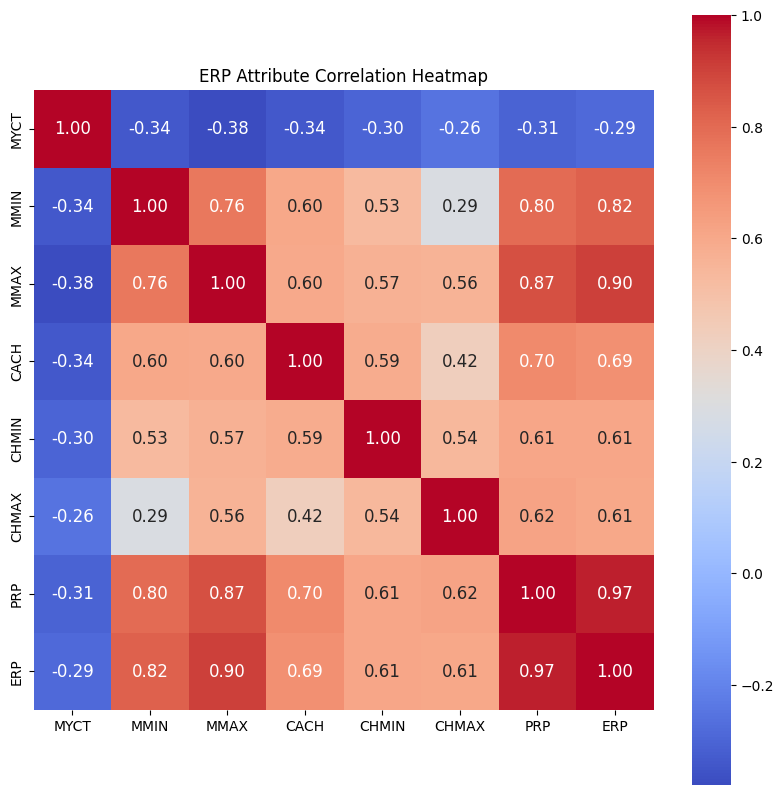

In [174]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Set the title for the plot
plt.title('ERP Attribute Correlation Heatmap')

# Create a heatmap of the correlation matrix
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white',annot_kws={'size': 12},  cmap='coolwarm')

# Rotate the x-axis labels for better readability
#a.set_xticklabels(a.get_xticklabels(), rotation=30)

# Rotate the y-axis labels for better readability
#a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Show the heatmap plot
plt.show()


**Comments**

*   ERP shows positive correlations with the following attributes: MMIN, MMAX, CACH, CHMIN, and CHMAX.

*   Particularly strong positive correlations are observed between ERP and MMIN, as well as between ERP and MMAX.


In [175]:
# visualise number of missing values
df.isnull().sum()

Vendor Name    0
Model Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [176]:
# dataset summary
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000
mean,204.2019,"2,880.5385","11,824.0192",24.0962,4.6442,17.7404,105.1779,98.8510
std,260.8330,"3,883.8393","11,747.9167",37.4180,6.7872,24.9134,161.0902,154.9750
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000,6.0000,15.0000
25%,50.0000,768.0000,"4,000.0000",0.0000,1.0000,5.0000,27.0000,28.0000
50%,110.0000,"2,000.0000","8,000.0000",8.0000,2.0000,8.0000,49.5000,45.0000
75%,225.0000,"4,000.0000","16,000.0000",32.0000,6.0000,24.0000,111.5000,99.5000
max,"1,500.0000","32,000.0000","64,000.0000",256.0000,52.0000,176.0000,"1,150.0000","1,238.0000"


In [177]:
# outlies in discrete variables

for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

50     0.1202
140    0.0433
300    0.0385
26     0.0385
180    0.0337
38     0.0337
320    0.0337
56     0.0337
105    0.0288
200    0.0288
75     0.0288
800    0.0288
160    0.0240
143    0.0240
900    0.0240
29     0.0192
25     0.0192
110    0.0192
60     0.0192
400    0.0192
23     0.0192
92     0.0144
100    0.0144
330    0.0144
225    0.0144
250    0.0144
115    0.0144
30     0.0144
480    0.0144
57     0.0096
17     0.0096
59     0.0096
240    0.0096
133    0.0096
72     0.0096
810    0.0096
700    0.0096
1500   0.0096
40     0.0096
125    0.0096
1100   0.0096
185    0.0048
167    0.0048
124    0.0048
116    0.0048
203    0.0048
70     0.0048
52     0.0048
90     0.0048
350    0.0048
112    0.0048
84     0.0048
220    0.0048
64     0.0048
48     0.0048
35     0.0048
175    0.0048
600    0.0048
150    0.0048
98     0.0048
Name: MYCT, dtype: float64

2000    0.2596
1000    0.1827
512     0.1058
4000    0.1058
8000    0.0962
256     0.0577
768     0.0481
16000   0.0337
384     0.00

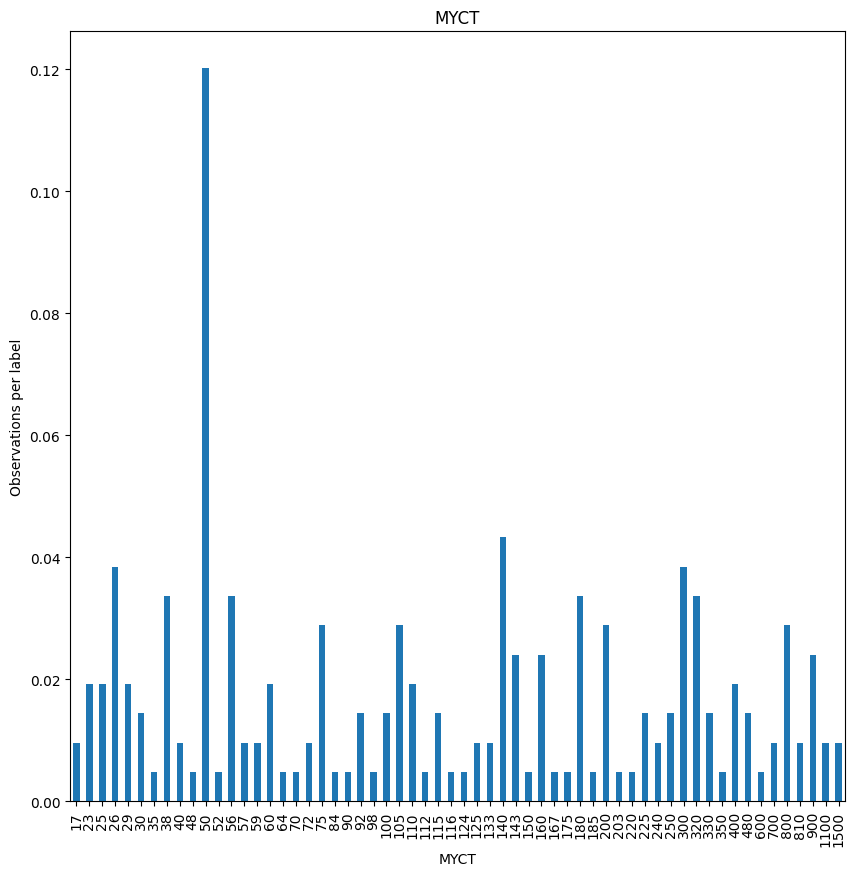

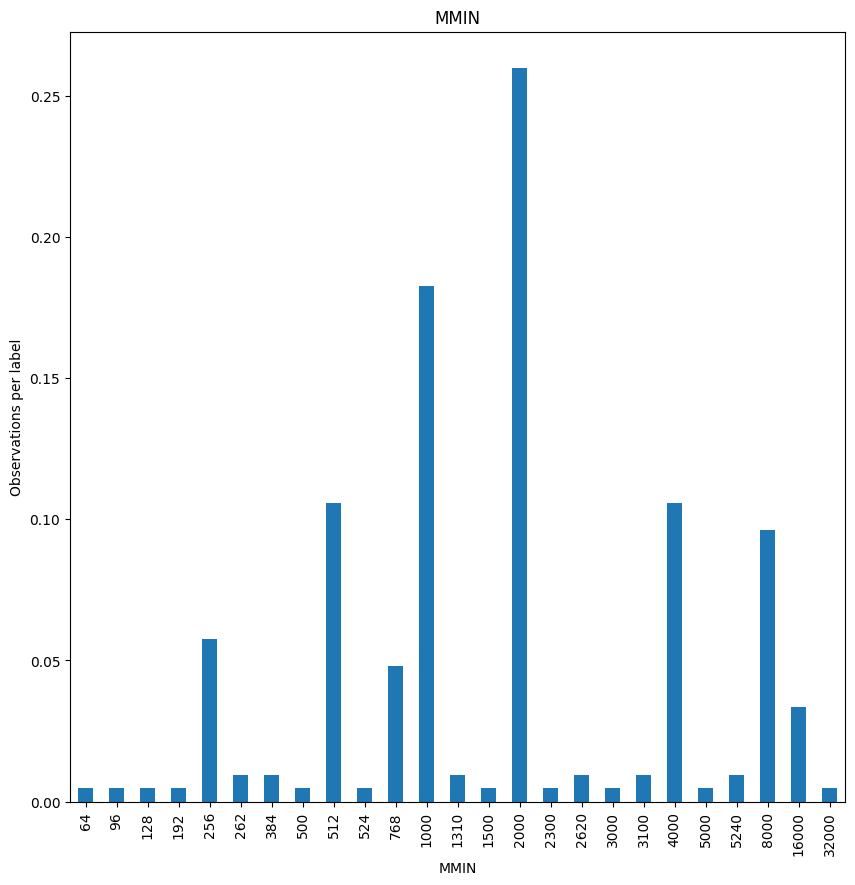

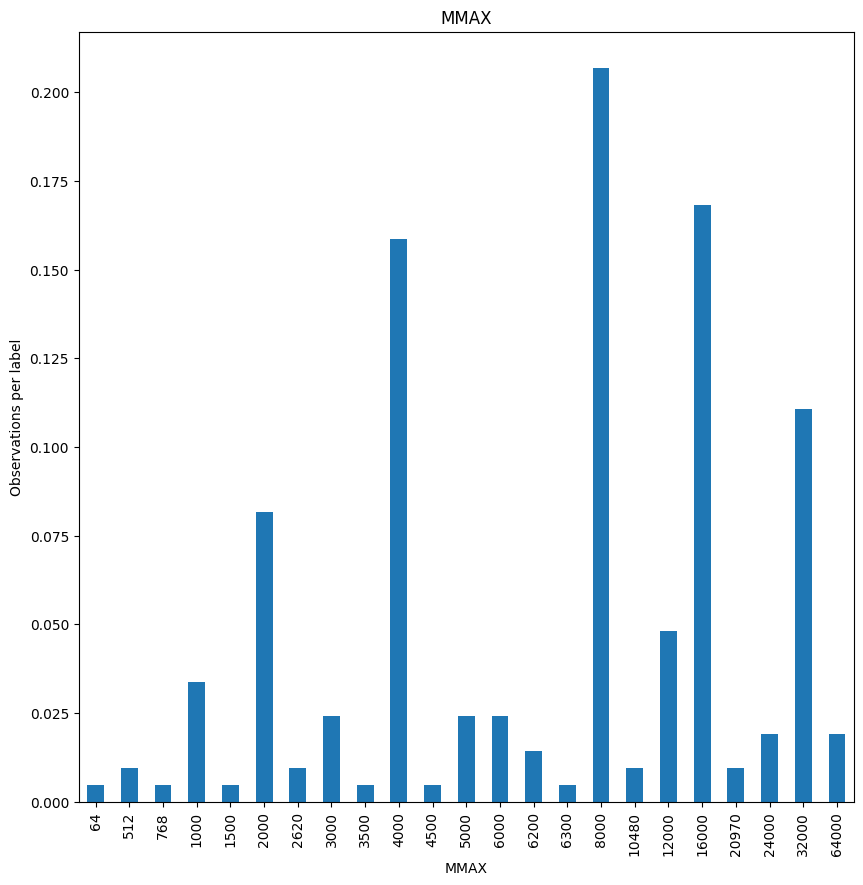

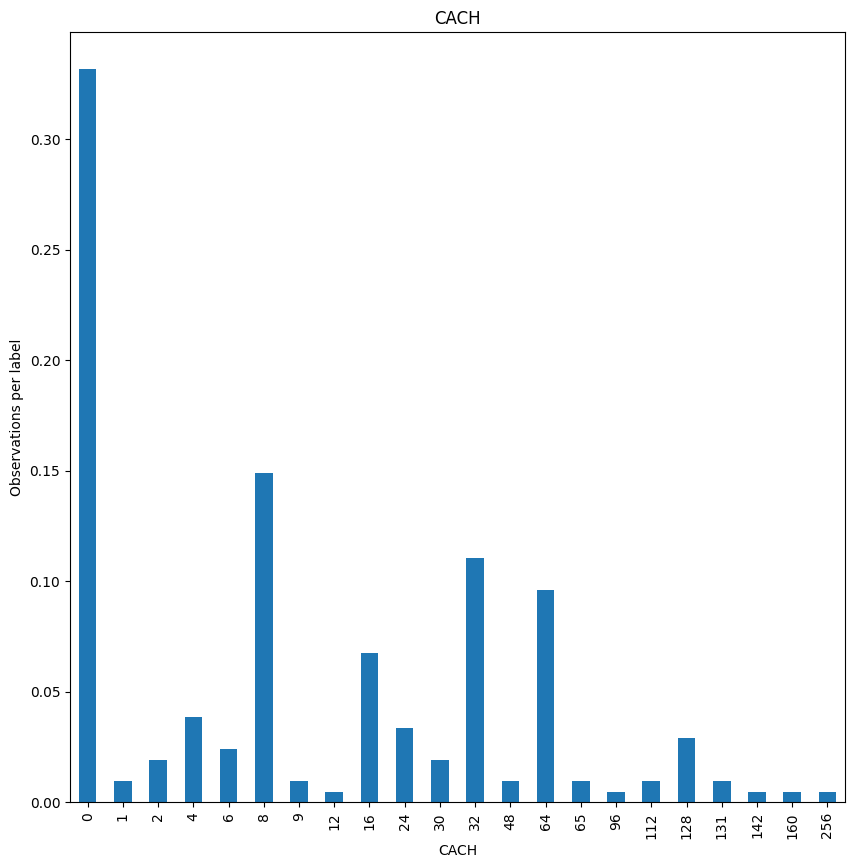

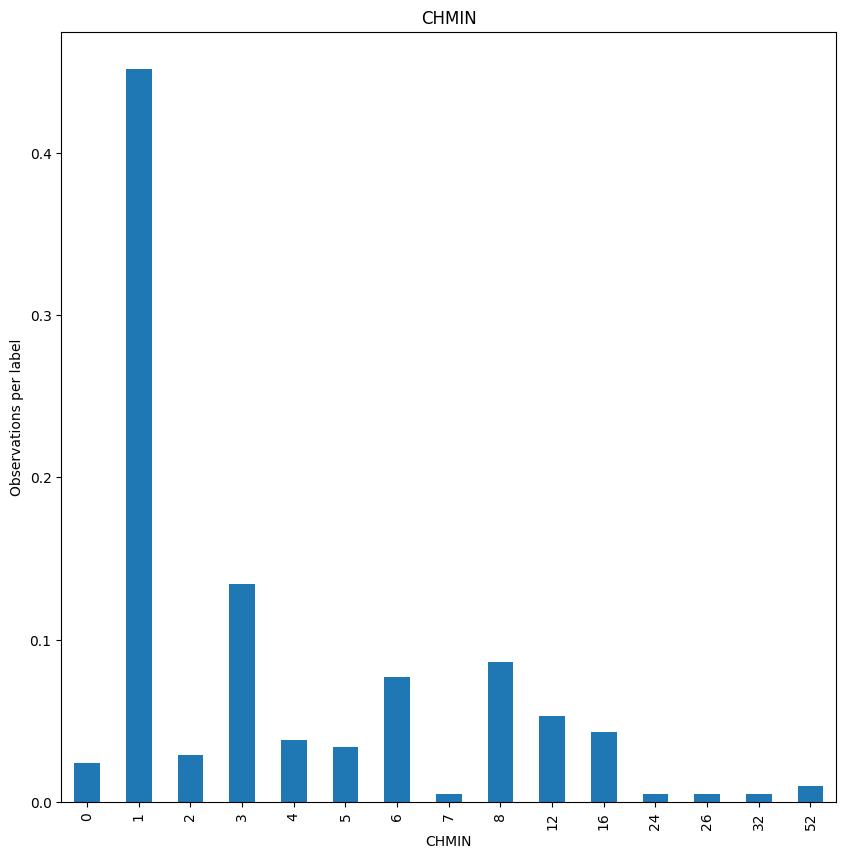

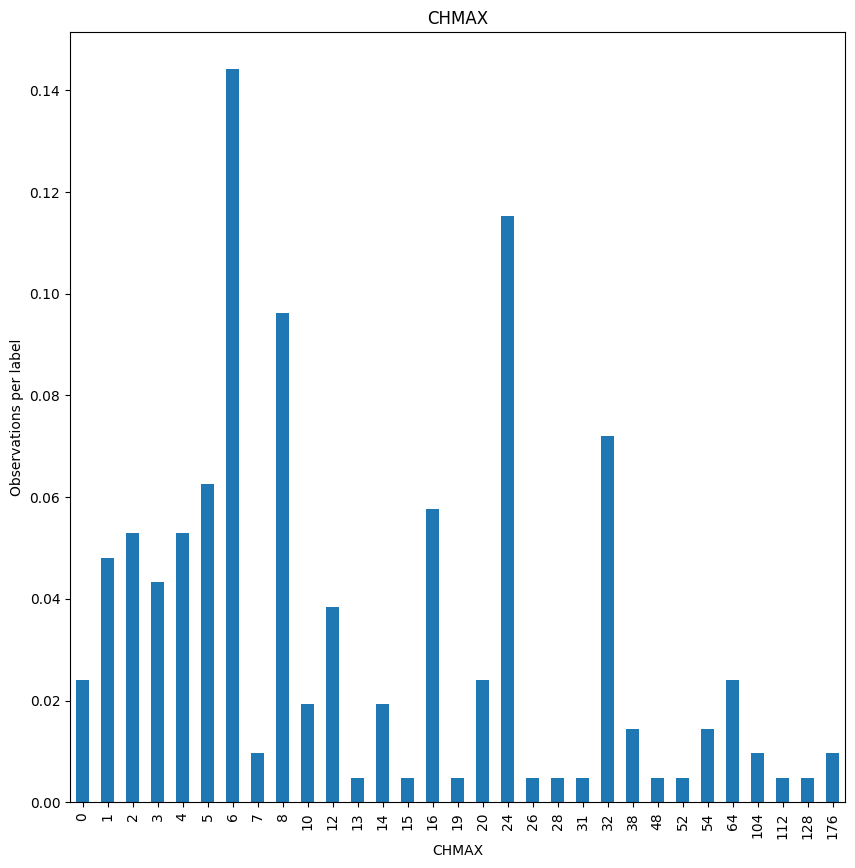

In [178]:


# Loop through a list of discrete variables
for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:

    # Create a new figure for the plot with a specific size
    plt.figure(figsize=(10, 10))

    # Calculate the percentage of observations per label for the current variable
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()

    # Add a y-axis label to indicate the percentage
    plt.ylabel('Observations per label')

    # Set the title of the plot to the variable name
    plt.title(var)

    # Display the plot
    plt.show()


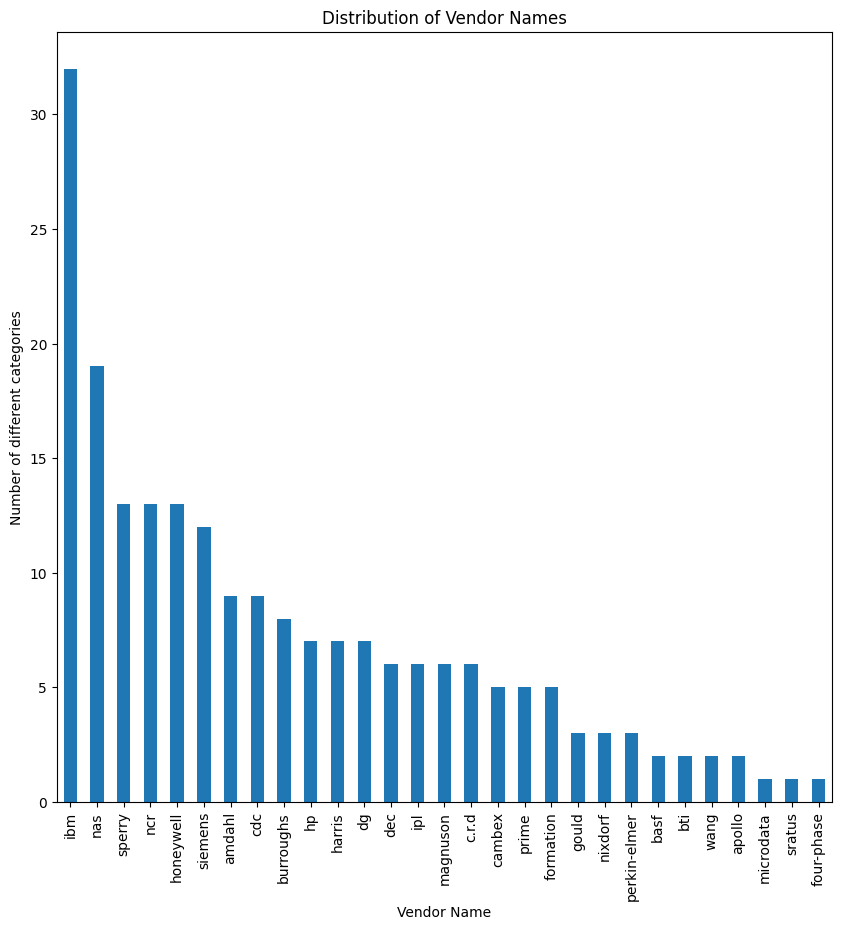

In [179]:
# plot the categorical variable

# Create a new figure for the plot with a specific size
plt.figure(figsize=(10, 10))

# Count the occurrences of each category in the 'Vendor Name' variable and create a bar plot
(df['Vendor Name'].value_counts()).plot.bar()

# Set the title of the plot
plt.title('Distribution of Vendor Names')

# Set the x-axis label
plt.xlabel('Vendor Name')

# Set the y-axis label
plt.ylabel('Number of different categories')

# Display the plot
plt.show()



In [180]:
df_cat = df.iloc[:,:2]

df_num = df.iloc[:, 2:]

In [181]:
df_num.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,29,8000,32000,32,8,32,269,253
1,29,8000,32000,32,8,32,220,253
2,29,8000,32000,32,8,32,172,253
3,29,8000,16000,32,8,16,132,132
4,26,8000,32000,64,8,32,318,290


In [182]:
X = df_num.iloc[:,0:6]

y = df_num.iloc[:,-1]

# **Splitting Training and Testing sets**

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [184]:
X_train.shape, y_train.shape

((145, 6), (145,))

In [185]:
X_test.shape, y_test.shape

((63, 6), (63,))

In [186]:
# let's inspect the training dataframe

X_train.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
61,125,512,1000,0,8,20
24,320,512,2000,4,1,3
30,25,1310,2620,131,12,24
60,800,256,8000,0,1,4
56,800,256,8000,0,1,4


In [187]:
X_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,145.0000,145.0000,145.0000,145.0000,145.0000,145.0000
mean,200.2828,"2,584.5517","11,370.4414",23.9379,4.2690,16.9448
std,240.6184,"3,259.2776","10,959.5851",38.5444,6.0773,25.2272
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000
25%,50.0000,768.0000,"4,000.0000",0.0000,1.0000,5.0000
50%,115.0000,"2,000.0000","8,000.0000",8.0000,1.0000,8.0000
75%,240.0000,"2,620.0000","16,000.0000",32.0000,6.0000,24.0000
max,"1,500.0000","16,000.0000","64,000.0000",256.0000,52.0000,176.0000


In [188]:
# Feature Scaling - I use the StandardScaler from sklearn

# import the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
X_train = scaler.fit_transform(X_train)

# transform the test set
X_test = scaler.transform(X_test)


# **Fitting Regression Model**

In [189]:
# fit the linear regression model

# import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# instantiate an object lr
lr = LinearRegression()


# Train the model using the training sets
lr.fit(X_train, y_train)


LinearRegression()

In [190]:
# Predict on the test data set
y_pred = lr.predict(X_test)

In [191]:

lr.predict(X_test)[0:5]

array([148.75283127, 113.70573218, 168.21296377, 366.79387711,
        95.81279286])

In [192]:
print("Number of coefficients:", len(lr.coef_))

print("Estimated coefficients: {}".format(lr.coef_))

print("Estimated intercept: {}".format(lr.intercept_))

Number of coefficients: 6
Estimated coefficients: [ 13.43782692  30.11767903  62.9635043   33.51577654 -10.68234297
  45.43328327]
Estimated intercept: 91.93103448275862


In [193]:
dataset = list(zip(pd.DataFrame(X_train).columns, lr.coef_))

pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

,Estimated Coefficients
Features,
0,13.4378
1,30.1177
2,62.9635
3,33.5158
4,-10.6823
5,45.4333


# **Evaluate Model performance**

Several ways to evaluate the model performance:

• RMSE (Root Mean Square Error)

• R2 Score

• Overfitting Vs Underfitting

• Cross validation

• Residual analysis

• Normality test

In [194]:
# RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 74.15


In [195]:
# R2 Score

from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.85


In [196]:
#Overfitting Vs Underfitting

# Evaluating training set performance

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

# Evaluating test set performance

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.85


In [197]:
#Cross validation

# import the library
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr, X, y, cv=5)

# print the 5-fold cross-validation scores
print(cv_scores.round(4))

# print the avarage 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

[ 0.864  -1.1902  0.7179  0.8742  0.7677]
Average 5-Fold CV Score: 0.4067


**Interpretation**

There is a large fluctuation in the cross validation scores of the model.

The average 5-fold cross validation score is very poor and hence the linear regression model is not a great fit to the data.

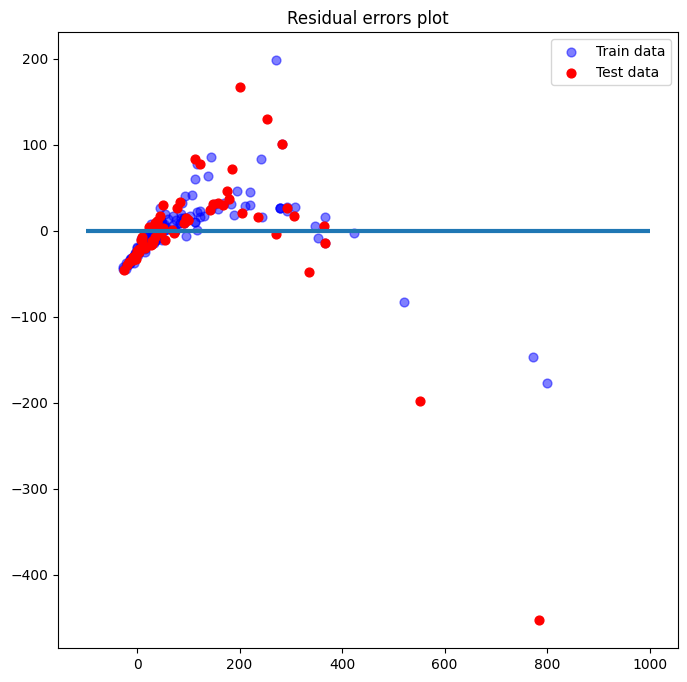

In [198]:
# Plot for residual error

# adjust the figure size
plt.figure(figsize=(8,8))

# plotting residual errors in training data
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()

### Interpretation of residual plots


A regression model that has nicely fit the data will have its residuals display randomness (i.e., lack of any pattern). This comes from the **homoscedasticity** assumption of regression modeling. Typically scatter plots between residuals and predictors are used to confirm the assumption. Any pattern in the scatter-plot, results in a violation of this property and points towards a poor fitting model.

Residual errors plot show that the data is randomly scattered around line zero. The plot does not display any pattern in the residuals.  Hence, we can conclude that the Linear Regression model is a good fit to the data.

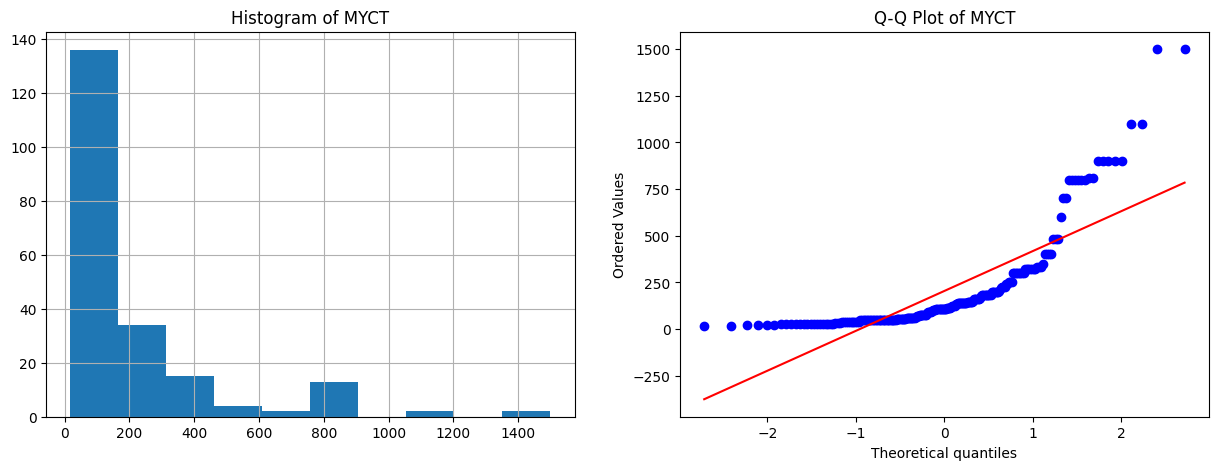

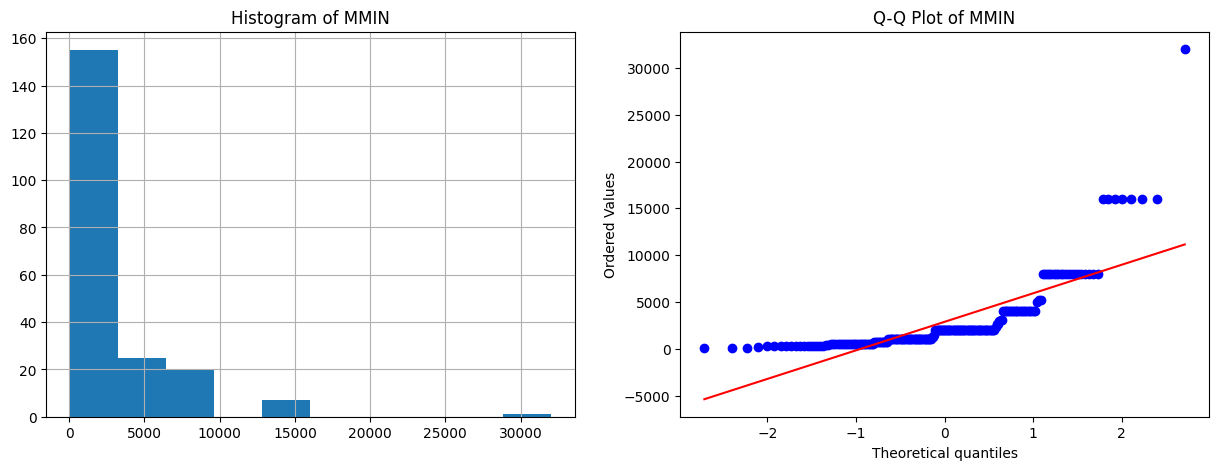

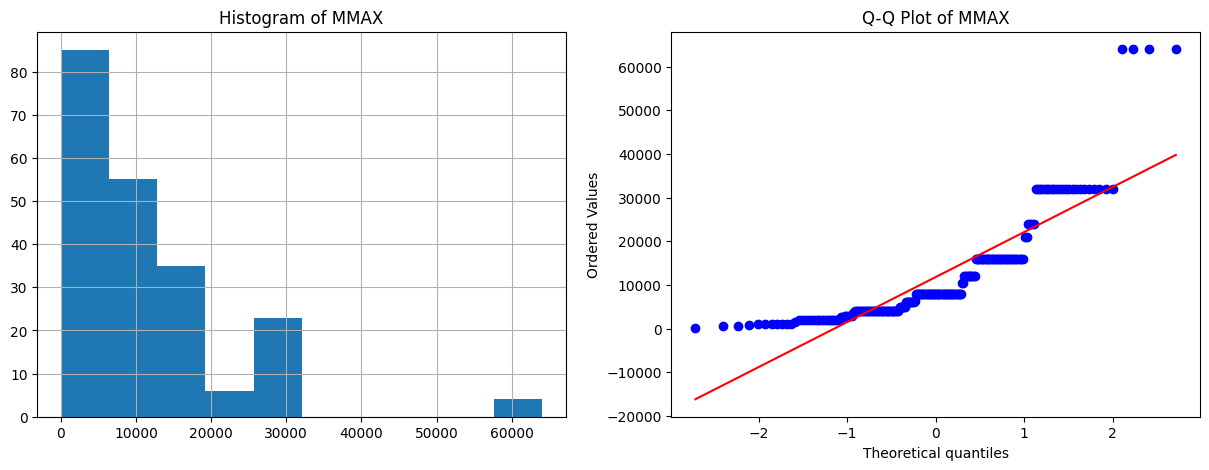

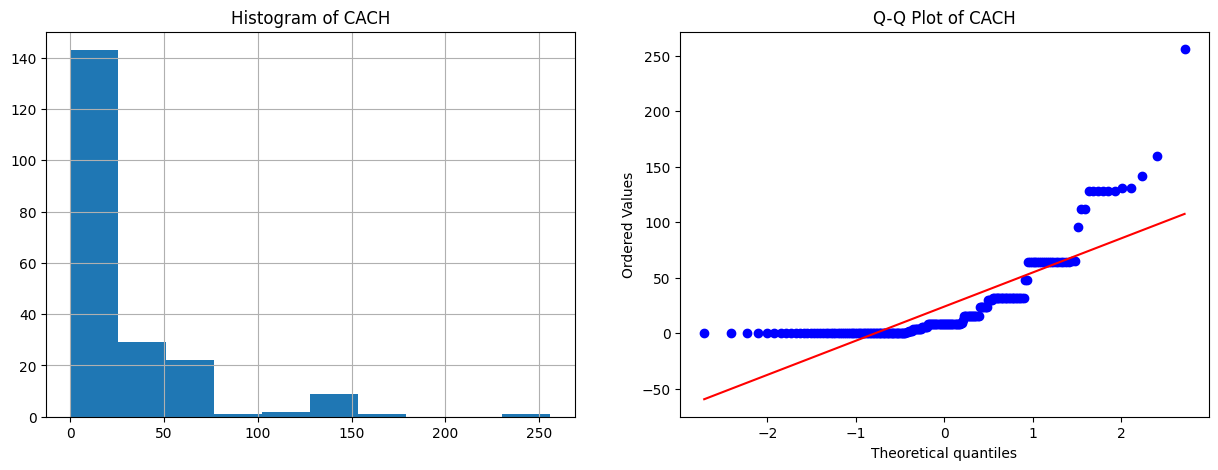

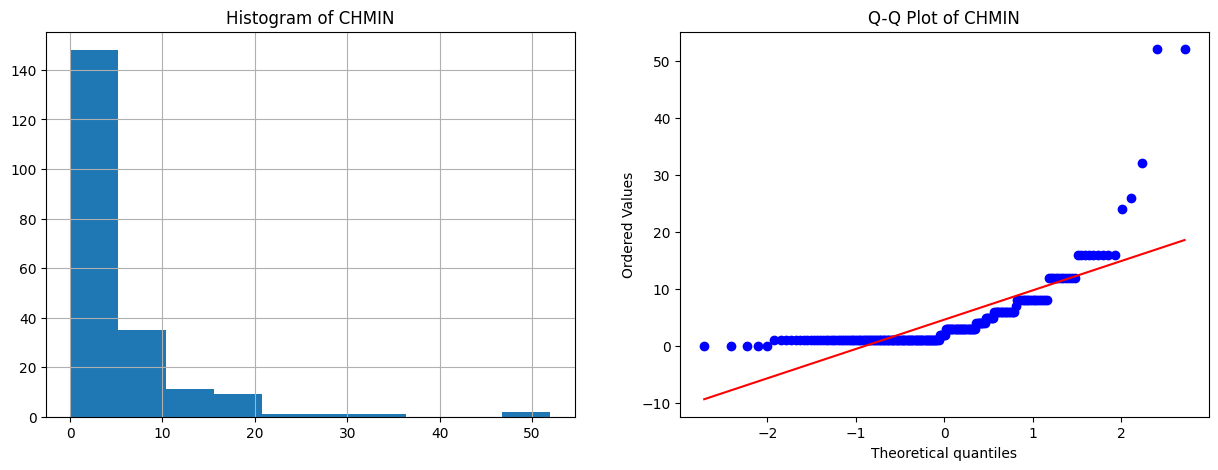

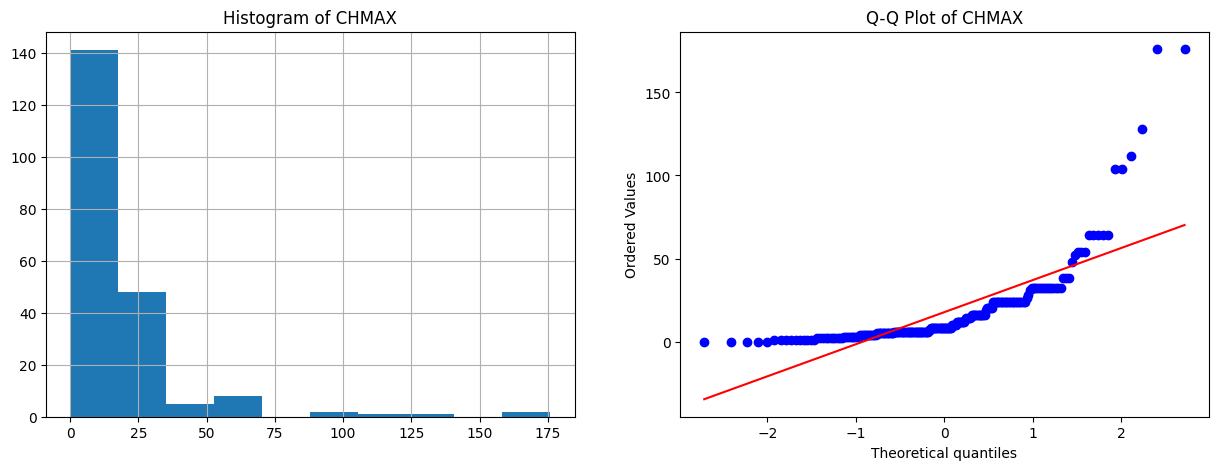

In [199]:
#Normality test (Q-Q Plot)

# plotting the Q-Q plot

import pylab
import scipy.stats as stats

# Loop through each variable for Q-Q plot
for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:

    # Create a new figure with two subplots
    plt.figure(figsize=(15,5))

    # Subplot 1: Histogram of the variable
    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Histogram of ' + var)

    # Subplot 2: Q-Q plot of the variable
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q Plot of ' + var)

    plt.show()  # Display the figure with both subplots




**Interpretation**


From the distribution plots, we can see that all the above variables are positively skewed.
The Q-Q plot of all the variables confirm that the variables are not normally distributed.

Hence, the variables do not pass the normality test.

In conclusion, the residual analysis indicates that the Linear Regression model appears to meet the assumption of homoscedasticity, as the residual errors are randomly scattered around the zero line without any discernible pattern. However, the model's performance, as reflected by an average R-squared value of 0.4691 from 5-fold cross-validation, suggests that it can only explain 46.91% of the variance in the target variable. This low R-squared value indicates that the Linear Regression model is not a strong fit for the data.

Furthermore, normality tests reveal that the variables in the model do not follow a normal distribution, which is an important assumption for Linear Regression. The Q-Q plots also confirm this lack of normality in the data. Consequently, it is clear that the Linear Regression model struggles to effectively capture the underlying relationships in the data and generate meaningful results.

# In light of these findings, it is recommended that alternative modeling approaches, capable of handling non-linear relationships, be considered for this dataset. Additionally, transformations of the variables may be necessary to meet the normality assumption required by Linear Regression.